<a href="https://colab.research.google.com/github/rodrigo103/AprendizajeAutomatico/blob/main/TP1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabajo Práctico 1

## Objetivos del trabajo práctico
Para el desarrollo del primer trabajo práctico, se espera que el alumno demuestre el aprendizaje de los temas de las unidades temáticas presentadas hasta el momento, a través de la exploración y solución de un set de datos asignado por la cátedra, enfatizando sobre los siguientes temas:

- Análisis exploratorio de datos. Describir y explorar un dataset y mostrar visualizaciones, indicadores y conclusiones.
- Entrenamiento de un clasificador. Entrenar un clasificador de acuerdo a las instrucciones para cada dataset y usar métricas de evaluación adecuadas
- Entrenamiento de un regresor. Entrenar un regresor de acuerdo a las instrucciones para cada dataset y usar métricas de evaluación adecuadas

## Entregables
A cada grupo se le asignará un dataset e instrucciones. Se espera que cada grupo de alumnos entregue, como parte del trabajo práctico, como mínimo, los siguientes documentos, a más tardar, el Domingo 16 de Octubre a las 23:59 horas.

#### Documentos obligatorios:
- Al menos un Jupyter Notebook que corra en un solo paso en Google Colab, el mismo deberá ser
guardado con las salidas de cada celda ya ejecutadas y en un solo paso. Alternativamente podrán
entregar un Jupyter Notebook por cada objetivo.
- Al menos un documento en formato PDF que corresponda con la salida del Notebook de Jupyter.
- Un documento en formato PDF con la finalidad de que sirva de material de soporte para la
presentación del trabajo. Esta presentación deberá contener, como mínimo, 10 páginas:
  - 1 diapositiva de descripción del set de datos
  - 3 diapositivas del análisis exploratorio de datos
  - 3 diapositivas mostrando la solución del problema de Clasificación
  - 3 diapositivas mostrando la solución del problema de Regresión

## Clase de presentación
Los alumnos deberán realizar una presentación a través de la plataforma meet y en el horario de la clase virtual, con los resultados obtenidos.
La clase de presentación será el Jueves 20 de Octubre.
Para poner en común los desarrollos de los trabajas prácticos adoptaremos el siguiente formato como base:
- Cada grupo dispondrá de 15 minutos para presentar el trabajo, con una división equitativa del contenido entre los integrantes.
- Para cada presentación, tanto los docentes como los alumnos que atiendan la misma dispondrán de 5 minutos luego de la misma, en el que podrán realizar preguntas a cada integrante
en particular o al grupo en general, sobre cualquiera de los temas presentados.
- Se evaluará tanto el desarrollo como el conocimiento expuesto. Se prestará especial atención a la elección de las métricas de evaluación, así como también al procedimiento que realice y a los resultados.

## Fechas
Fecha límite para entregables
- Domingo 16 de Octubre del 2022

Fecha de presentación de trabajos prácticos:
- Jueves 20 de Octubre del 2022

## Distribución de grupos y tema
Los grupos estarán compuestos por 2 o 3 integrantes.
El dataset para cada grupo es:  
https://archive-beta.ics.uci.edu/ml/datasets/online+news+popularity#Descriptive

EDA: Cada grupo deberá realizar un EDA para todas las variables del dataset.

Clasiﬁcación: Cada grupo deberá entrenar y validar un clasiﬁcador multiclase para predecir la característica Shared

Regresión: Cada grupo deberá entrenar un regresor que prediga la cantidad de veces que fue compartida la noticia

## Clasiﬁcación
Para generar la columna target del ejercicio de clasiﬁcación, deberá valerse de la siguiente función:
```python
def get_label(share):
  if share <= 870:
    return 'Very Poor'
  elif share <= 1200:
    return 'Poor'
  elif share <= 1800:
    return 'Average'
  elif share <= 3400:
    return 'Good'
  else:
    return 'Very Good'

data['shares_clasif'] = data['shares'].apply(get_label)
```

In [106]:
# Librerías de análisis de datos

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# from pandas.api.types import CategoricalDtype

from pandas.plotting import scatter_matrix

from pprint import pprint

In [107]:
# Librerías de Machine Learning

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [108]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [109]:
!pwd

/content


In [110]:
!ls drive/MyDrive/AprendizajeAutomatico

'Copia de Copia de TP1.ipynb'		       OnlineNewsPopularity.names
 online-news_Fernandes-Vinagre-Sernadela.pdf   TP1-1.ipynb
 OnlineNewsPopularity.csv		       TP1.ipynb


In [111]:
df = pd.read_csv("drive/MyDrive/AprendizajeAutomatico/OnlineNewsPopularity.csv", sep=', ') # agregué el espacio, se estaban parceando con un espacio las keys
df.describe()

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


La siguiente linea que se ejecutó al intentar crear la columna con los target para clasificación da error

In [112]:
df['shares']

0         593
1         711
2        1500
3        1200
4         505
         ... 
39639    1800
39640    1900
39641    1900
39642    1100
39643    1300
Name: shares, Length: 39644, dtype: int64

Guiado por el siguiente link imprimo el listado de nombres de las columnas:  
https://www.geeksforgeeks.org/how-to-fix-keyerror-in-pandas/

In [113]:
print(df.columns.tolist())

['url', 'timedelta', 'n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length', 'num_keywords', 'data_channel_is_lifestyle', 'data_channel_is_entertainment', 'data_channel_is_bus', 'data_channel_is_socmed', 'data_channel_is_tech', 'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min', 'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares', 'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity', 'global_sentiment_polarity', 'global_rate_positive_words', 'global_rate_negative_words', 'rate_positive_words', 'rate_negative_words', 'avg_positive_polarity', '

Se ve que el nombre de la columna incluye un espacio y por eso no se estaba encontrando.  
Ahora si, corriendo el siguiente código puedo generar la columna de los target para la claficación.

In [114]:
def get_label(share):
  if share <= 870:
    return 'Very Poor'
  elif share <= 1200:
    return 'Poor'
  elif share <= 1800:
    return 'Average'
  elif share <= 3400:
    return 'Good'
  else:
    return 'Very Good'

df['shares_clasif'] = df['shares'].apply(get_label)
df

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,shares_clasif
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.70,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593,Very Poor
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.70,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711,Very Poor
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,1.00,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500,Average
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.80,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200,Poor
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,1.00,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505,Very Poor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,http://mashable.com/2014/12/27/samsung-app-aut...,8.0,11.0,346.0,0.529052,1.0,0.684783,9.0,7.0,1.0,...,0.75,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000,1800,Average
39640,http://mashable.com/2014/12/27/seth-rogen-jame...,8.0,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,...,0.70,-0.211111,-0.400,-0.100000,0.300000,1.000000,0.200000,1.000000,1900,Good
39641,http://mashable.com/2014/12/27/son-pays-off-mo...,8.0,10.0,442.0,0.516355,1.0,0.644128,24.0,1.0,12.0,...,0.50,-0.356439,-0.800,-0.166667,0.454545,0.136364,0.045455,0.136364,1900,Good
39642,http://mashable.com/2014/12/27/ukraine-blasts/,8.0,6.0,682.0,0.539493,1.0,0.692661,10.0,1.0,1.0,...,0.50,-0.205246,-0.500,-0.012500,0.000000,0.000000,0.500000,0.000000,1100,Poor


Para el análisis exploratorio me parecería interesante hacer gráficos que muestren la distribución de shares para las noticias de los distintos data_channel (son 6)
También me parece interesante graficar la relación entre número de imagenes y numero de shares y entre número de videos y numero de shares y entre la suma de ambos y numero de shares.

También me parece interesante graficar el número de shares con respecto al día de la semana de la noticia.


Hay muchas columnas de las cuales no entiendo bien su significado.
- Que es el timedelta?
  - Es la cantidad de días entre que se publicó el artículo y que se armó el dataset. Es decir, nos indica cuantos shares se realizaron desde que se publicó la noticia hasta que se midieron los shares en el dataset.
- Que es un token y por que tiene largo.
  - Un token es como se llama en este caso a una palabra (lo puedo deducir de leer la linea 2 de Attribute Information)
- que es una palabra non-stop?
- Que es una palabra clave
- Las mejores y peores palabras clave
- Los shares de auto referencia
- La cercanía a los tópicos LDA (Latent Dirichlet Allocation)
- La positividad o negatividad de las palabras en el contenido
- rate_positive_words
    - Creo que es igual a:  
  $\frac{positive\ words}{positive\ words + negative\ words}$  
  Y con rate_positive_words es similar, entonces siempre se va a dar que
  $ \text{rate_positive_words} + \text{rate_negative_words}  = 1$  
  excepto que ambas sean cero, lo cual explica la curva que trazó Victor
- los tokens no neutrales
- Las relacionadas a la polaridad de las palabras
- Las relacionadas a la subjetividad

Despues de hacer este listado con dudas se me ocurre que el timedelta, (que es el dato mas importante que nos condiciona es la cantidad de shares) es un buen predictor de la cantidad de shares y se debería de alguna forma anular su efecto. Pero definitivamente se debe hacer un gráfico de shares vs timedelta.
Igualmente tal vez me equivoco, porque es esperable es que apenas se publique una noticia se comparta varias veces mientras es nueva y cuando pasa el tiempo se comparta cada vez menos, por lo que si el timedelta es suficentemente grande no debería afectar a la cantidad de shares.

Escribir ejemplos de palabras positivas y ejemplos de palabras negativas.

Hay que realizar algún gráfico de positividad o negatividad de palabras, pero es complicado creo..
Tal vez se podría observar gráficando global_rate_of_positive_works vs shares y lo mismo para las negativas que a mas palabras negativas mas se comparte un artículo.

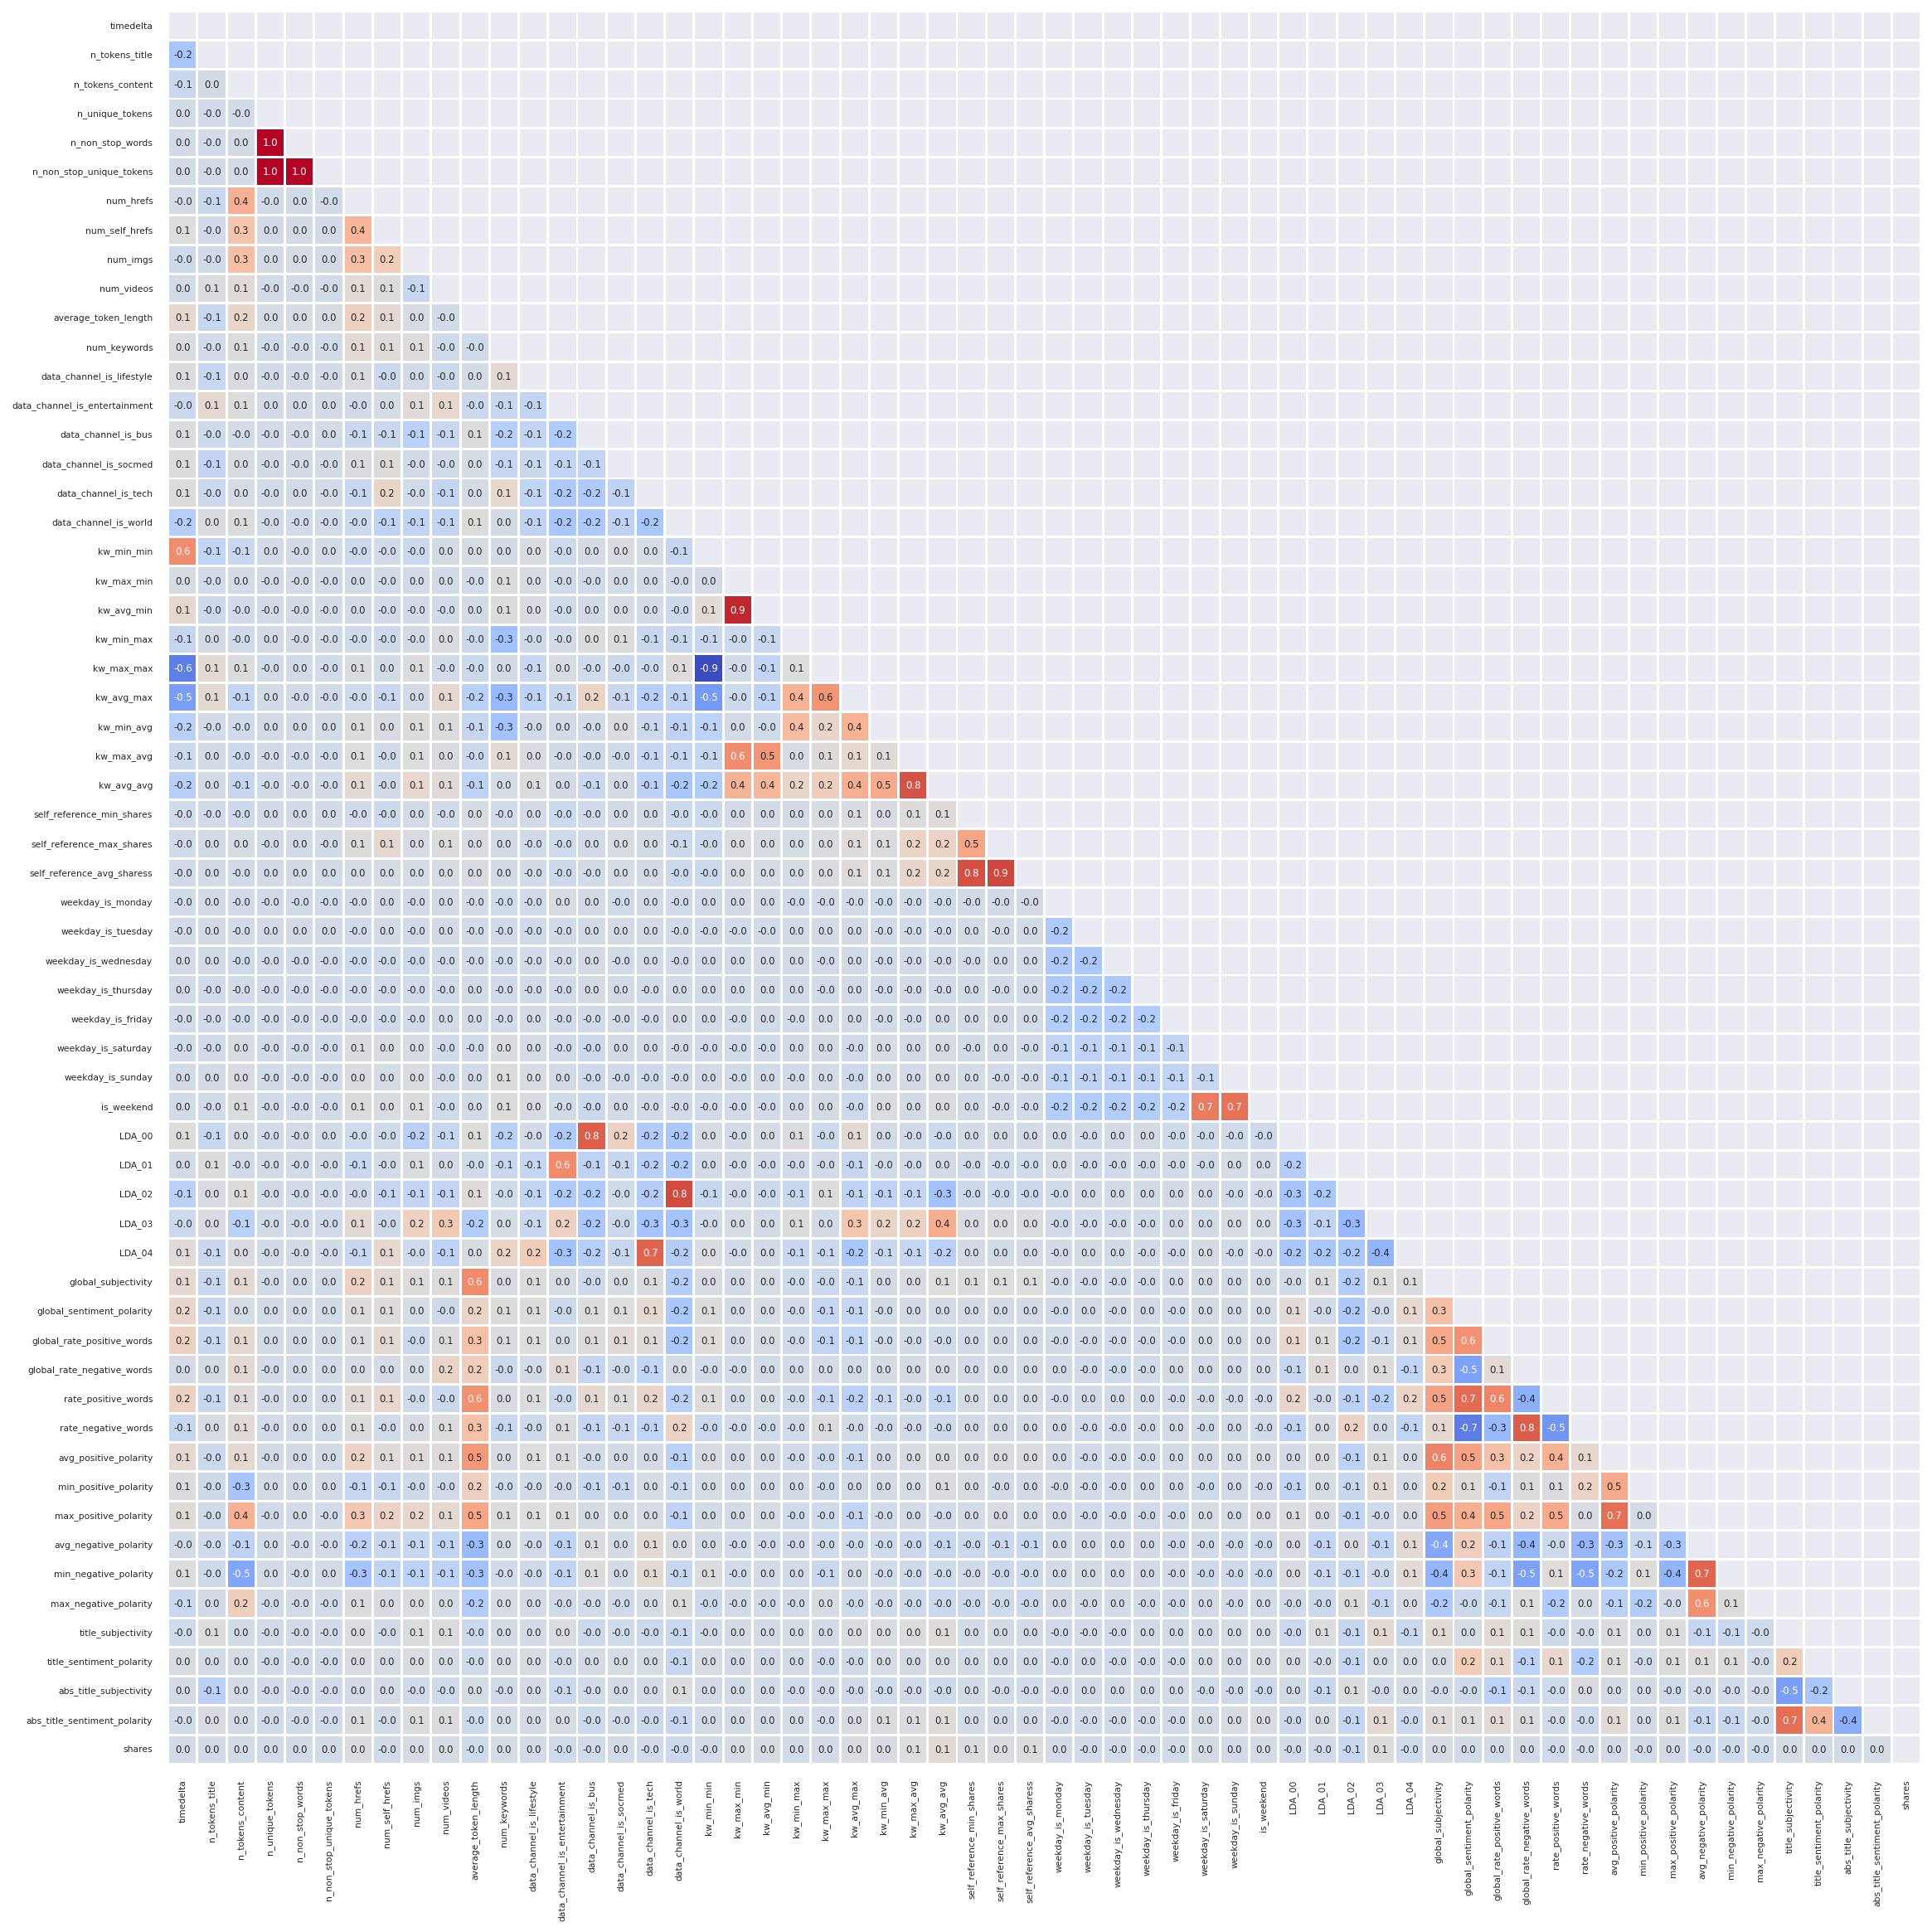

In [115]:
# Update some default parameters for plotting throughout the notebook
plt.rcParams.update({'font.size': 12, 'xtick.labelsize':15, 'ytick.labelsize':15, 'axes.labelsize':15, 'axes.titlesize':20})
correlation_matrix = df.corr()

# Returns copy of array with upper part of the triangle (which will be masked/hidden)
mask = np.triu(correlation_matrix.corr())

sns.set(font_scale=0.5)
plt.figure(figsize=(20, 20), dpi=140)
sns.heatmap(correlation_matrix, annot=True, fmt='.1f', cmap='coolwarm', 
            square=True, mask=mask, linewidths=1, cbar=False)
plt.show()

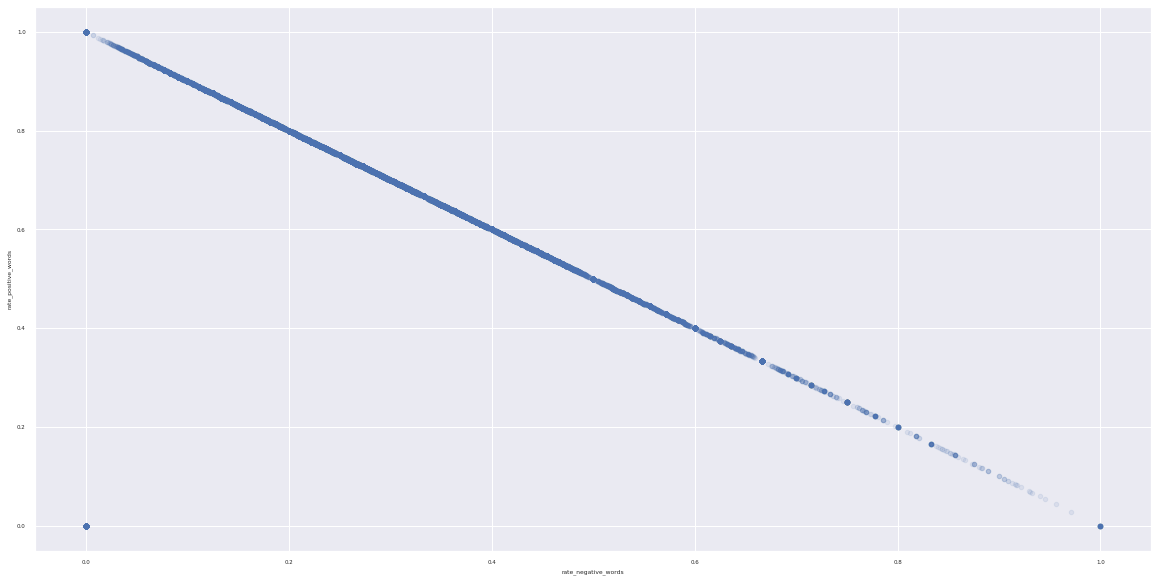

In [116]:
# para graficar cualquier relacion. Numerica

attributes = ["shares", "rate_positive_words", "rate_negative_words"]
#scatter_matrix(df[attributes], figsize=(12, 8))
df.plot(kind="scatter", x="rate_negative_words", y="rate_positive_words", alpha=0.1, figsize=(20, 10))

In [117]:
df.loc[:100,  ["rate_positive_words", "rate_negative_words"]].sort_values(by='rate_positive_words', ascending=0)

,rate_positive_words,rate_negative_words
41,1.000000,0.000000
87,1.000000,0.000000
23,1.000000,0.000000
58,1.000000,0.000000
61,1.000000,0.000000
...,...,...
25,0.500000,0.500000
80,0.428571,0.571429
24,0.400000,0.600000
13,0.347826,0.652174


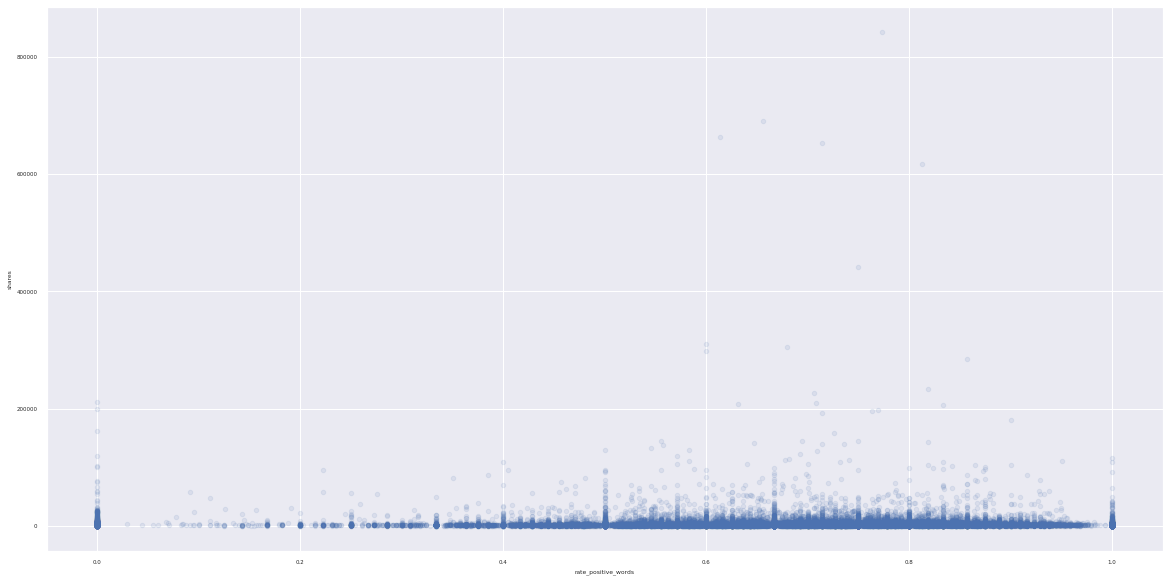

In [118]:
df.plot(kind="scatter", x="rate_positive_words", y="shares", alpha=0.1, figsize=(20, 10))

El gráfico parece indicar que a mayor rate_positive_words, mayor cantidad de shares.

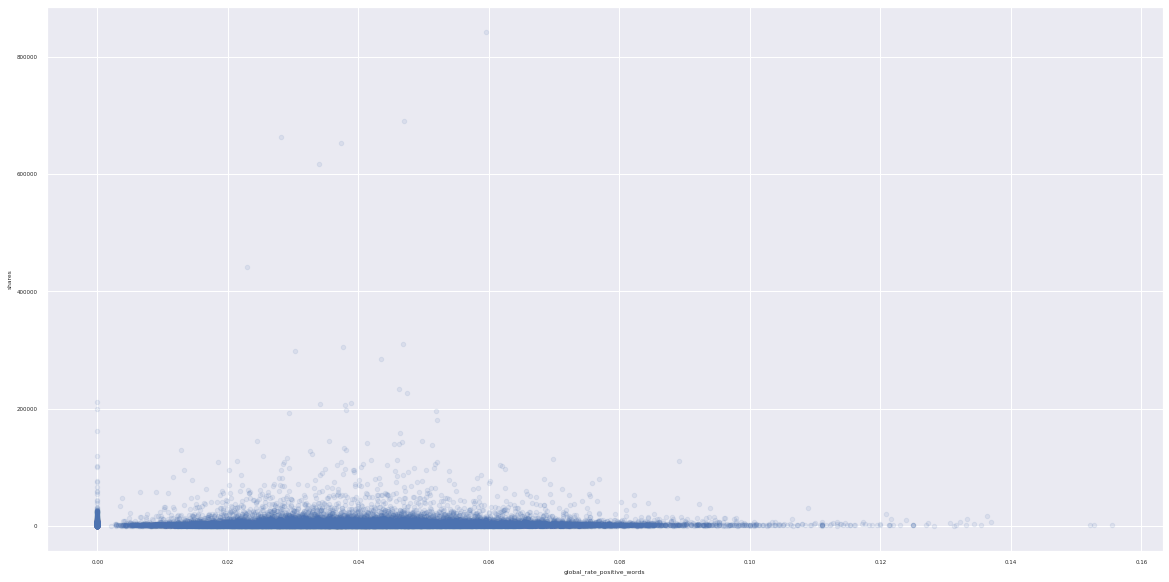

In [119]:
df.plot(kind="scatter", x="global_rate_positive_words", y="shares", alpha=0.1, figsize=(20, 10))

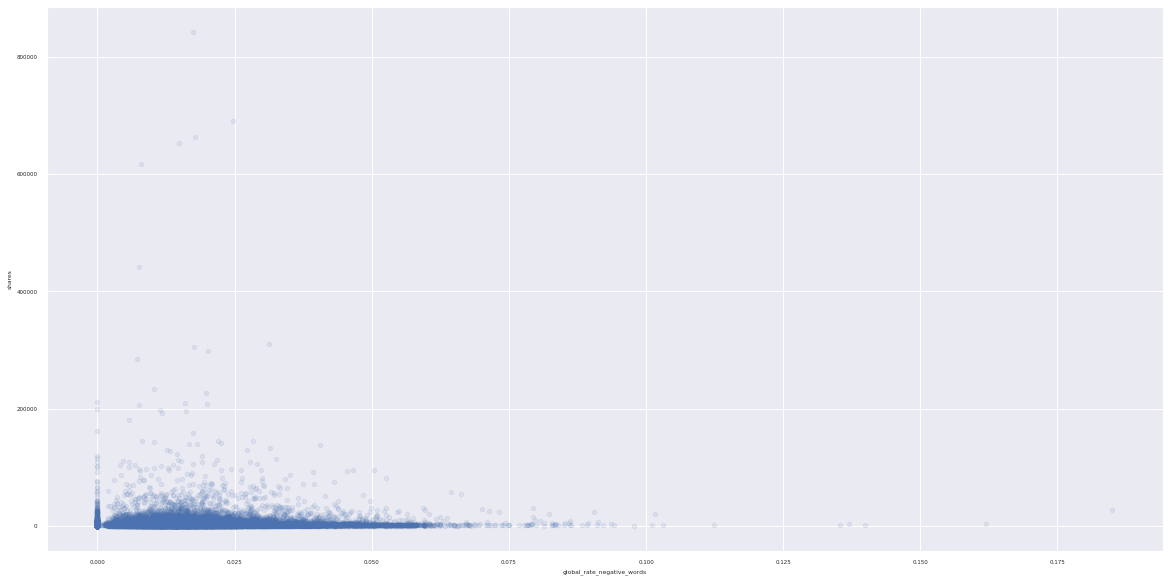

In [120]:
df.plot(kind="scatter", x="global_rate_negative_words", y="shares", alpha=0.1, figsize=(20, 10))

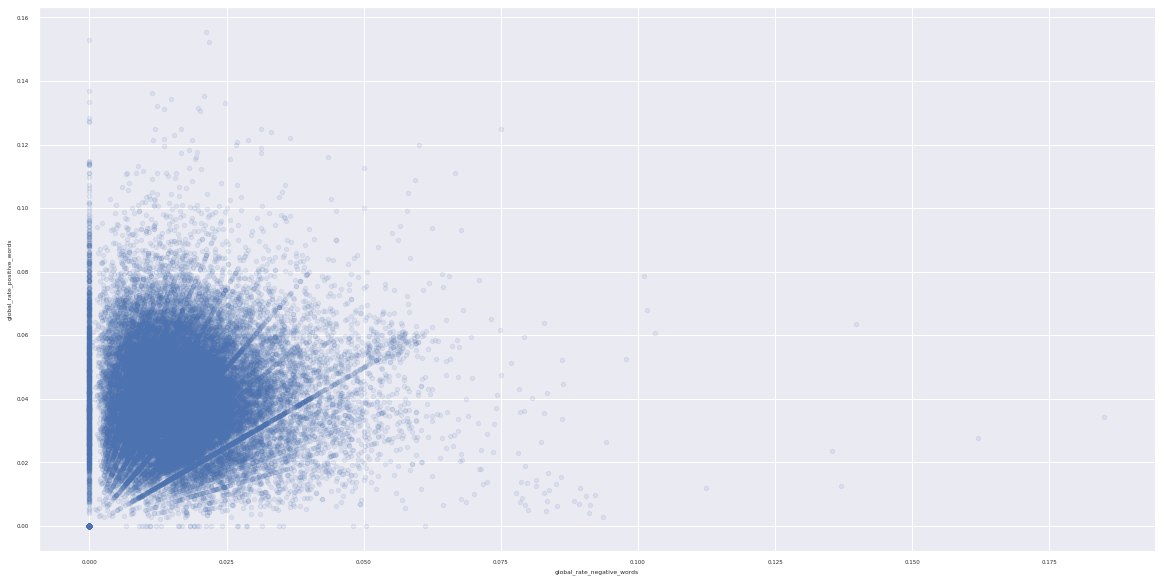

In [121]:
df.plot(kind="scatter", x="global_rate_negative_words", y="global_rate_positive_words", alpha=0.1, figsize=(20, 10))

No se si este gráfico de arriba indica algo

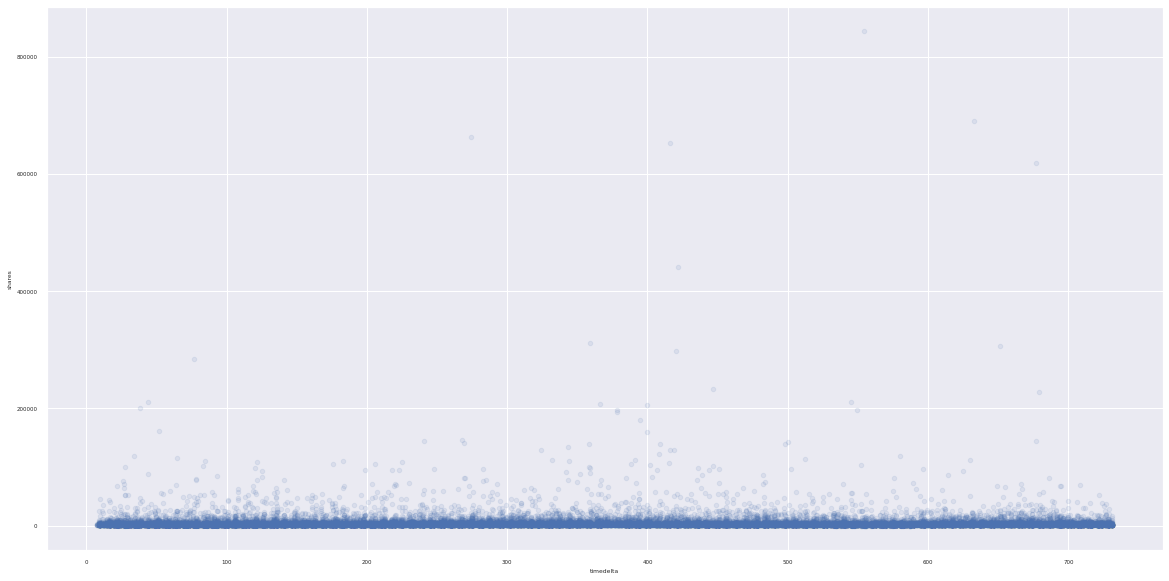

In [122]:
df.plot(kind="scatter", x="timedelta", y="shares", alpha=0.1, figsize=(20, 10))

El gráfico anterior parece mostrar que la cantidad de shares es independiente del timedelta. Es decir, no porque haya pasado mas tiempo desde que se publicó la noticia hasta que se midieron los shares va a tener mas shares.

(0.0, 40000.0)

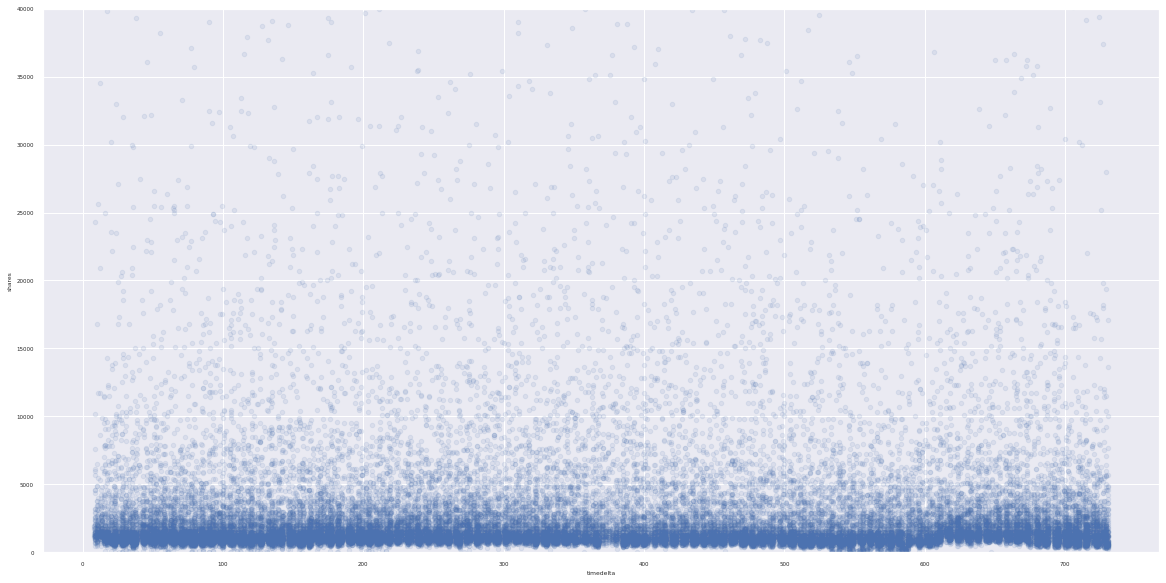

In [123]:
df.plot(kind="scatter", x="timedelta", y="shares", alpha=0.1, figsize=(20, 10)).set_ylim(0,40000)

Haciendo un acercamiento (recortando las noticias con mas de 40000 compartidas) podemos ver que no se oberva ninguna relación relevante.

Aca quisiera hacer un diagrama de barras que muestre la cantidad de shares para cada día de la semana

In [124]:
print( sum( df.weekday_is_monday == 1 ) )
print( sum( df.weekday_is_tuesday == 1 ) )
print( sum( df.weekday_is_wednesday == 1 ) )
print( sum( df.weekday_is_thursday == 1 ) )
print( sum( df.weekday_is_friday == 1 ) )
print( sum( df.weekday_is_saturday == 1 ) )
print( sum( df.weekday_is_sunday == 1 ) )

# df.plot(kind="scatter", x=["weekday_is_monday"], y="shares", alpha=0.1, figsize=(20, 10))

6661
7390
7435
7267
5701
2453
2737


Conclusión: La gente comparte menos noticias los fines de semana

In [125]:
df.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


(0.0, 40000.0)

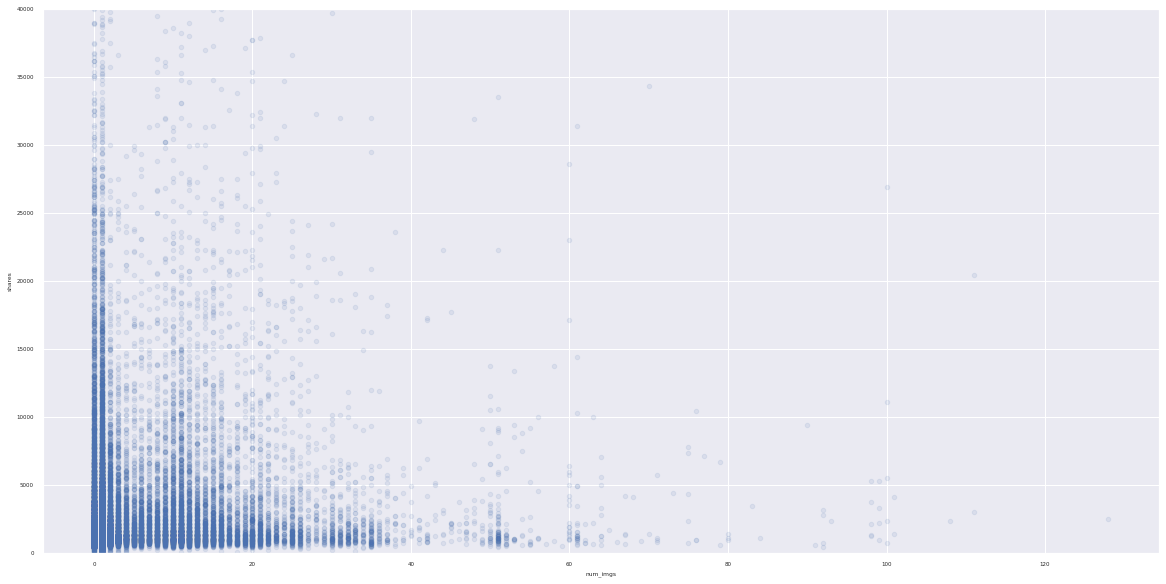

In [126]:
df.plot(kind="scatter", x="num_imgs", y="shares", alpha=0.1, figsize=(20, 10)).set_ylim(0,40000)

(0.0, 40000.0)

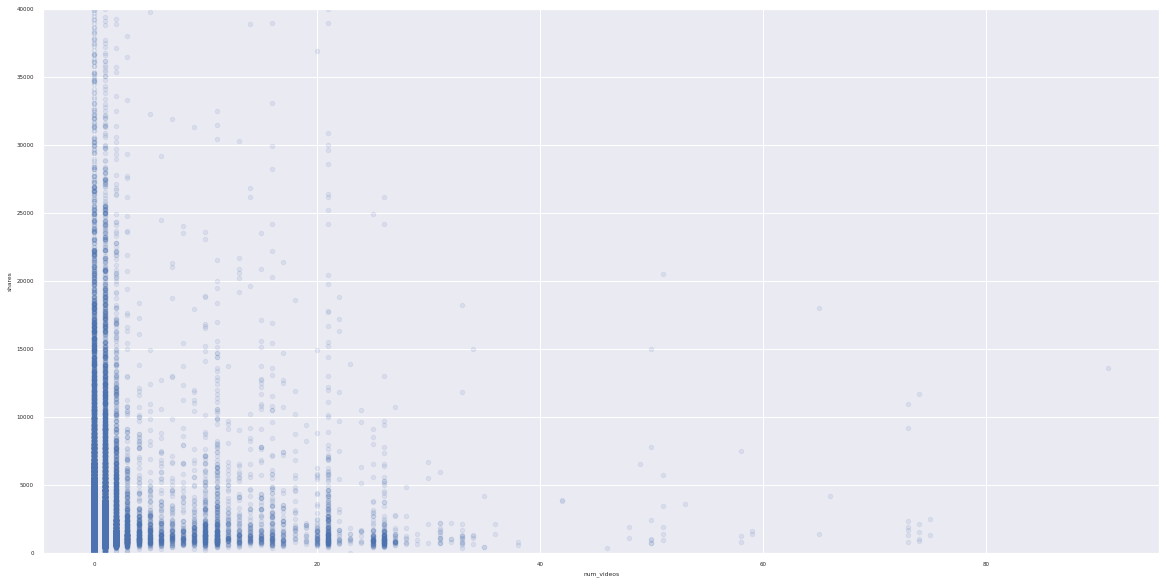

In [127]:
df.plot(kind="scatter", x="num_videos", y="shares", alpha=0.1, figsize=(20, 10)).set_ylim(0,40000)

Pruebo modificando parámetros del DecisionTree

In [128]:
features = [
    'timedelta', 'n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs', 'num_self_hrefs', 
    'num_imgs', 'num_videos', 'average_token_length', 'num_keywords', 
    'data_channel_is_lifestyle', 'data_channel_is_entertainment', 'data_channel_is_bus', 'data_channel_is_socmed', 'data_channel_is_tech', 'data_channel_is_world', 
    'kw_min_min', 'kw_max_min', 'kw_avg_min', 'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg', 
    'self_reference_min_shares', 'self_reference_max_shares', 'self_reference_avg_sharess', 
    'weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday', 'weekday_is_sunday', 
    'is_weekend', 
    'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 
    'global_subjectivity', 'global_sentiment_polarity', 
    'global_rate_positive_words', 'global_rate_negative_words', 'rate_positive_words', 'rate_negative_words', 
    'avg_positive_polarity', 'min_positive_polarity', 'max_positive_polarity', 'avg_negative_polarity', 'min_negative_polarity', 'max_negative_polarity', 
    'title_subjectivity', 'title_sentiment_polarity', 'abs_title_subjectivity', 'abs_title_sentiment_polarity'
    ]

X = df[features]
y = df.shares

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)






# Define model. Specify a number for random_state to ensure same results each run
model = DecisionTreeRegressor(random_state=1)

# Fit model
model.fit(train_X, train_y)


print("Making predictions for the following 5 news:")
print(X.head())
print("The predictions are")
val_predictions = model.predict(val_X)
print(val_predictions)
print(val_y.tolist())



print(mean_absolute_error(val_y, val_predictions))






def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y, random_state):

    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=random_state) 

    pipeline = Pipeline(steps=[('model', model)])

    pipeline.fit(train_X, train_y)
    preds_val = pipeline.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)



print(get_mae(None, train_X, val_X, train_y, val_y, 0))
print(get_mae(None, train_X, val_X, train_y, val_y, 1))


# compare MAE with differing values of max_leaf_nodes

candidate_max_leaf_nodes = [None, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50, 500, 5000]


# for max_leaf_nodes in :
#     my_mae = get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y, 1)
#     print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))



scores = {leaf_size: get_mae(leaf_size, train_X, val_X, train_y, val_y, 1) for leaf_size in candidate_max_leaf_nodes}

print(scores)

best_tree_size = min(scores, key=scores.get)
print(best_tree_size)



# # Define the models

# Function for comparing different models
def score_model(model, X_t=train_X, X_v=val_X, y_t=train_y, y_v=val_y):
    model.fit(X_t, y_t)
    preds = model.predict(X_v)
    return mean_absolute_error(y_v, preds)

models = [
#     RandomForestRegressor(random_state=1)
#     RandomForestRegressor(n_estimators=50, random_state=1),
#     RandomForestRegressor(n_estimators=100, random_state=1),
#     # RandomForestRegressor(n_estimators=100, criterion='absolute_error', random_state=1),
#     # RandomForestRegressor(n_estimators=200, min_samples_split=20, random_state=1),
#     # RandomForestRegressor(n_estimators=100, max_depth=7, random_state=1),
    XGBRegressor(), 
    XGBRegressor(n_estimators=500), 
    XGBRegressor(n_estimators=1000, learning_rate=0.05),
]

for i in range(0, len(models)):
    mae = score_model(models[i])
    print("Model %d MAE: %d" % (i+1, mae))



my_model2 = XGBRegressor(n_estimators=500)
my_model2.fit(train_X, train_y,
              early_stopping_rounds=5, 
             eval_set=[(val_X, val_y)],
             verbose=False)
preds = my_model2.predict(val_X)
print("Mean Absolute Error: " + str(mean_absolute_error(preds, val_y)))

Making predictions for the following 5 news:
   timedelta  n_tokens_title  n_tokens_content  n_unique_tokens  \
0      731.0            12.0             219.0         0.663594   
1      731.0             9.0             255.0         0.604743   
2      731.0             9.0             211.0         0.575130   
3      731.0             9.0             531.0         0.503788   
4      731.0            13.0            1072.0         0.415646   

   n_non_stop_words  n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  \
0               1.0                  0.815385        4.0             2.0   
1               1.0                  0.791946        3.0             1.0   
2               1.0                  0.663866        3.0             1.0   
3               1.0                  0.665635        9.0             0.0   
4               1.0                  0.540890       19.0            19.0   

   num_imgs  num_videos  ...  avg_positive_polarity  min_positive_polarity  \
0       1.0      